# EDA

In [22]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import seaborn as sns

# for working with audio data
import librosa, librosa.display

In [2]:
# load metadata csv
df = pd.read_csv('../../Data/features_30_sec.csv')

In [3]:
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [5]:
# are the songs of equal length?
df['length'].unique()

array([661794, 669680, 661676, 665280, 661760, 663520, 661408, 661344,
       670120, 672282, 663080, 663300, 666820, 668800, 661100, 663740,
       664180, 666160, 668140, 667920, 665060, 661504, 664400, 669240,
       660000, 667700, 675808, 665940, 662112, 672100, 661980, 667480,
       661500, 670340, 669460], dtype=int64)

Each song is sampled at a rate of 22,050 Hz and is about 30 seconds long. There are about 661,500 samples per song as seen in the `length` column.

There is quite a bit of metadata for each song, but we will focus on transforming the audio files into various "visual-like" representations. So, the relevant columns for us are the `filename` and `label`.

In [6]:
df = df[['filename', 'label']]
df.head()

filename  label
0  blues.00000.wav  blues
1  blues.00001.wav  blues
2  blues.00002.wav  blues
3  blues.00003.wav  blues
4  blues.00004.wav  blues

In [7]:
df['label'].value_counts()

disco        100
reggae       100
pop          100
jazz         100
hiphop       100
country      100
rock         100
metal        100
classical    100
blues        100
Name: label, dtype: int64

The 1,000 songs are uniformly distributed across the 10 genres.

In [8]:
# relative path to the directory of audio file genre subfolders
rel_path = '../../Data/genres_original/'

# create relative path to each audio file
df['file_path'] = rel_path + df['label'] + '/' + df['filename']

# drop 'filename' column
df = df.drop(columns='filename')
df.head()

label                                         file_path
0  blues  ../../Data/genres_original/blues/blues.00000.wav
1  blues  ../../Data/genres_original/blues/blues.00001.wav
2  blues  ../../Data/genres_original/blues/blues.00002.wav
3  blues  ../../Data/genres_original/blues/blues.00003.wav
4  blues  ../../Data/genres_original/blues/blues.00004.wav

## Waveforms

In [78]:
# jazz sample 556
y, sr = librosa.load(df['file_path'][506], duration=30)

In [79]:
# take a listen
ipd.Audio(y, rate=sr)

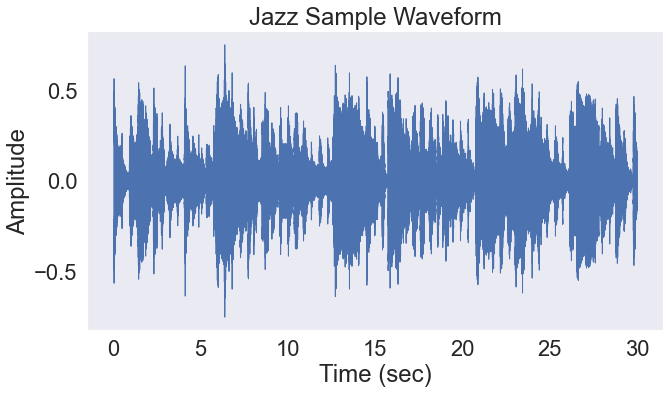

In [76]:
# set style
sns.set_theme(context='talk')
sns.set(font_scale=2)

# visualize waveform
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(y, sr=sr, ax=ax);
ax.set(title='Jazz Sample Waveform', xlabel='Time (sec)', ylabel='Amplitude')

# no gridlines and tight layout for slides
ax.grid(False)
plt.tight_layout()

# save
fig.savefig('jazz_sample_waveform.png')

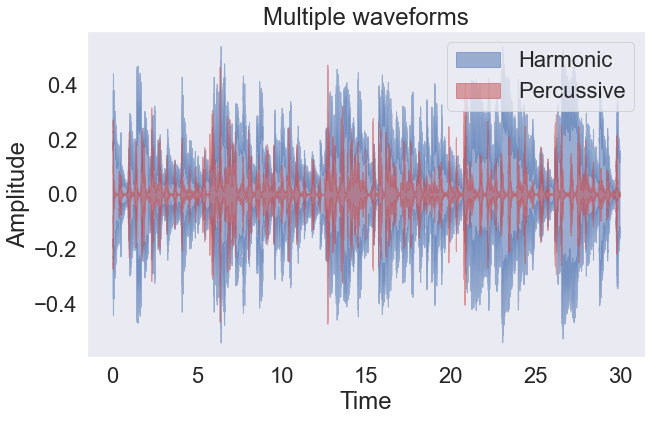

In [26]:
# decompose into harmonic and percussive component waveforms
y_harm, y_perc = librosa.effects.hpss(y)

# visualize both components
fig, ax = plt.subplots(figsize=(10,6))
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax, label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax, label='Percussive')
ax.set(title='Multiple waveforms', ylabel='Amplitude')
ax.legend()
ax.grid(False);

In [20]:
# listen to percussive component
ipd.Audio(y_harm, rate=sr)

## Mel Spectrograms

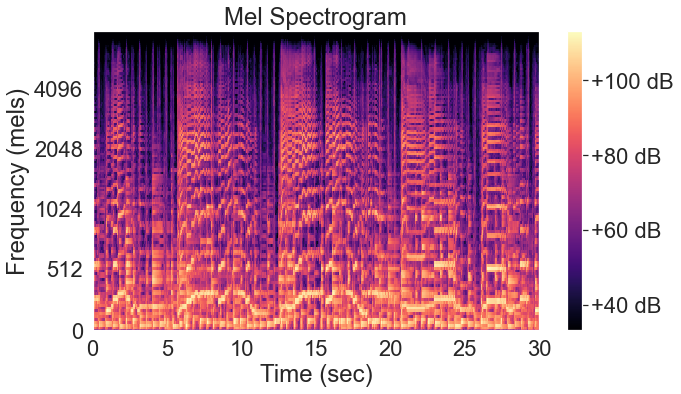

In [77]:
# mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)

# convert to dB for human loudness perception
S_dB = librosa.power_to_db(S, ref=np.min)

# visualize it
fig, ax = plt.subplots(figsize=(10,6))
S_dB_img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', fmax=8000, ax=ax)
fig.colorbar(S_dB_img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel Spectrogram', xlabel='Time (sec)', ylabel='Frequency (mels)')

# tight layout for slides
plt.tight_layout()

fig.savefig('mel_spec.png')

In [124]:
S_dB.shape

(128, 1292)

The mel spectrogram is 128x1292. There are 128 mels, which is are human-perceptual Hz. There are 1292 frames in the 30-second sample. The values are in dB for relative loudness, which is how humans perceive loudness.

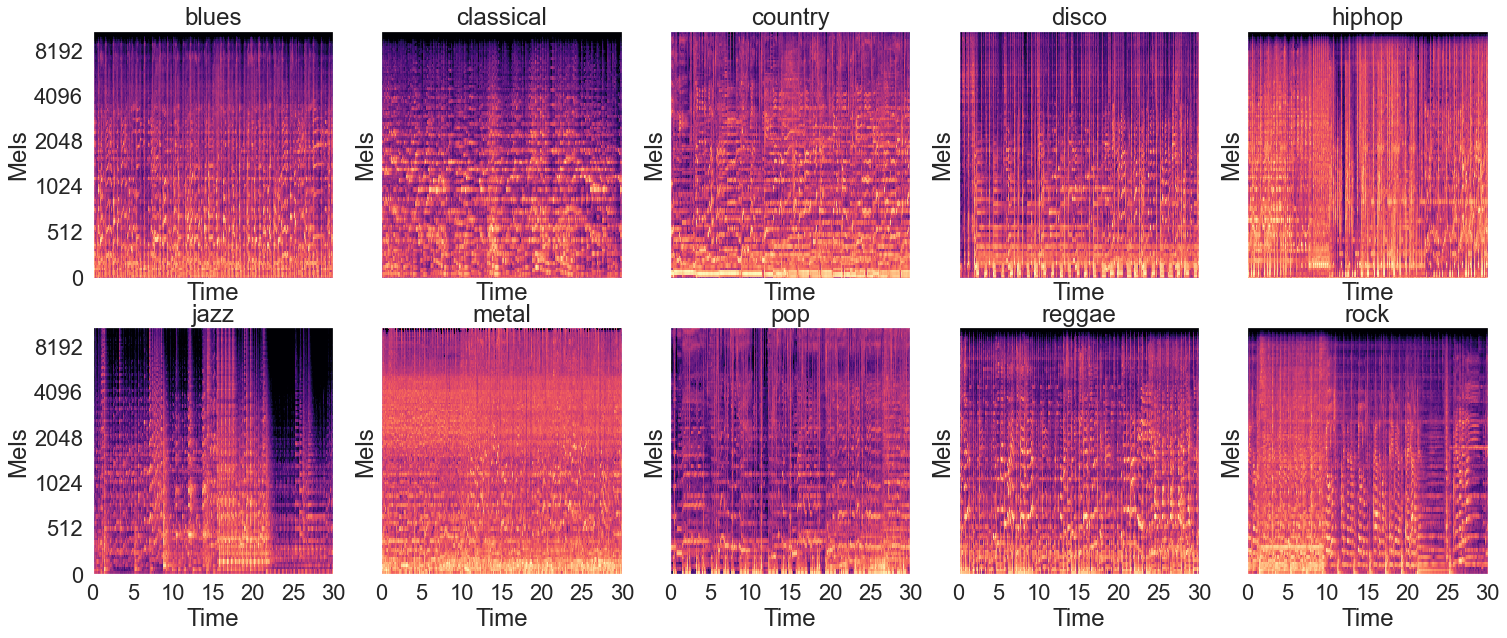

In [33]:
# create mel spectrograms for each genre
mel_specs = []
genres=[]
for sample in range(0, 999, 100):
    y, sr = librosa.load(df['file_path'][sample], duration=30)
    S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.min)
    mel_specs.append(S_dB)
    genres.append(df['label'][sample])
    
# visualize them
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10), sharex=True, sharey=True)
ax = ax.ravel()
for i in range(10):
    S_dB_img = librosa.display.specshow(mel_specs[i], x_axis='time', y_axis='mel', ax=ax[i])
    #fig.colorbar(S_dB_img, ax=ax, format='%+2.0f dB')
    ax[i].set(title=genres[i], ylabel='Mels');

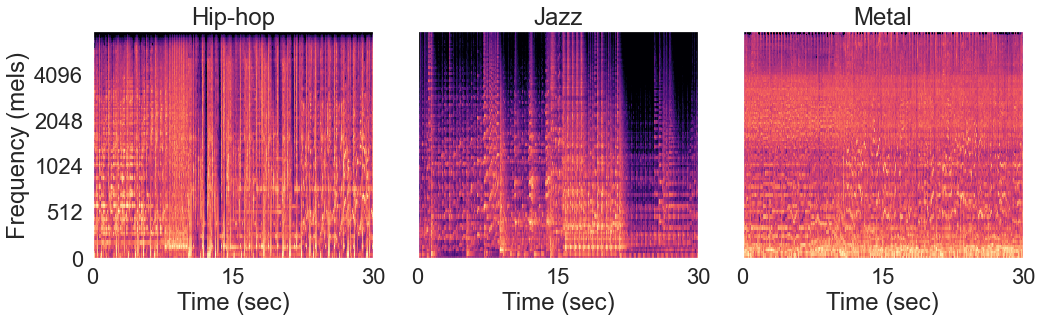

In [73]:
# create mel spectrograms for each genre
mel_specs = []
genres=[]
for sample in [400, 500, 600]:
    y, sr = librosa.load(df['file_path'][sample], duration=30)
    S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=y, sr=sr), ref=np.min)
    mel_specs.append(S_dB)
    genres.append(df['label'][sample])
    
# visualize them
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharex=True, sharey=True)
ax = ax.ravel()
for i in range(3):
    S_dB_img = librosa.display.specshow(mel_specs[i], x_axis='time', y_axis='mel', fmax=8000, ax=ax[i])
    #fig.colorbar(S_dB_img, ax=ax, format='%+2.0f dB')
    ax[i].set(title=genres[i].capitalize(), xlabel='Time (sec)', ylabel='', xticks=[0, 15, 30])
ax[0].set(title='Hip-hop', ylabel='Frequency (mels)')

# tight layout for slides
plt.tight_layout()

fig.savefig('mel_comparison.png')

## MFCCs

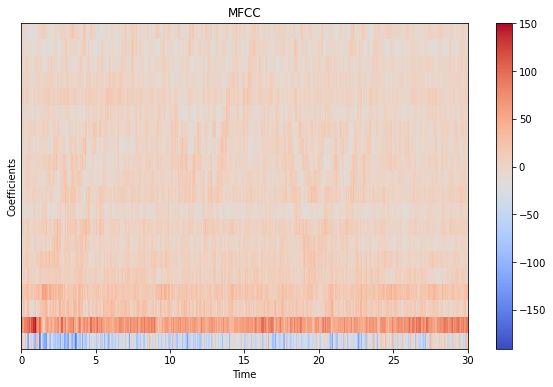

In [14]:
# mel-frequency cepstrum coefficient
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# visualize it
fig, ax = plt.subplots(figsize=(10,6))
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC', ylabel='Coefficients');

In [147]:
mfcc.shape

(20, 1292)

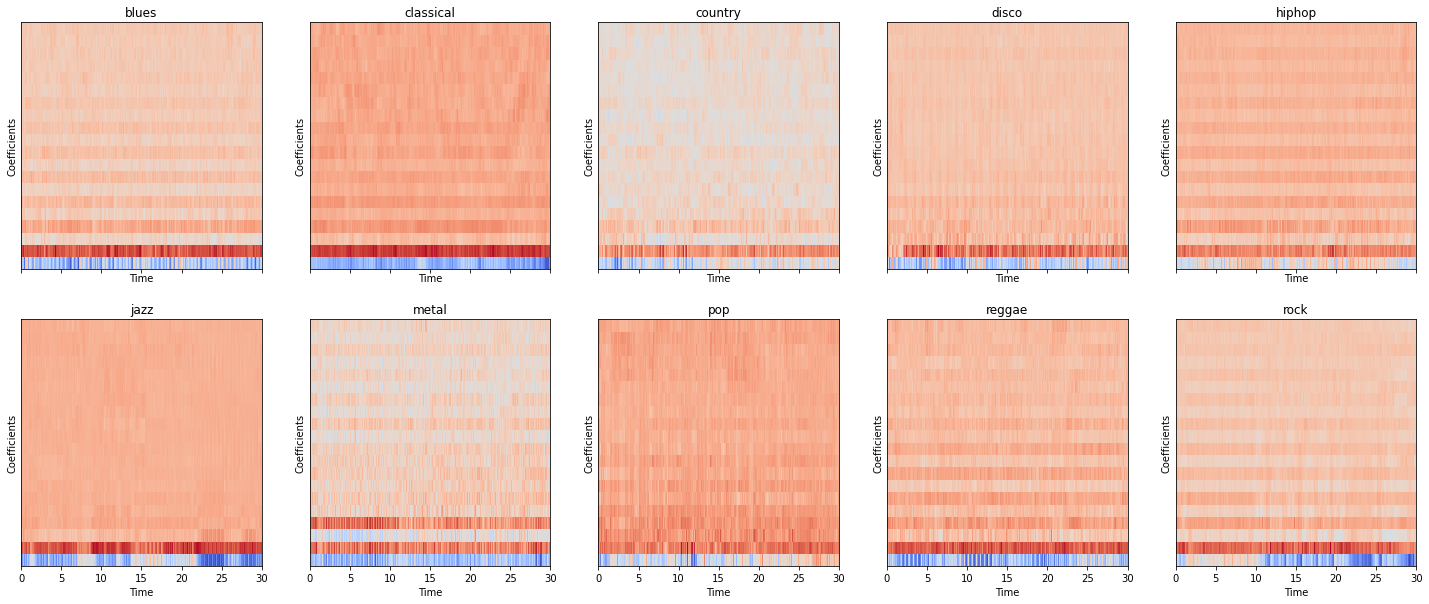

In [150]:
# create mel spectrograms for each genre
mfccs_samples = []
genres=[]
for sample in range(0, 999, 100):
    y, sr = librosa.load(df['file_path'][sample], duration=30)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    mfccs_samples.append(mfccs)
    genres.append(df['label'][sample])
    
# visualize them
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(25,10), sharex=True, sharey=True)
ax = ax.ravel()
for i in range(10):
    mffcs_image = librosa.display.specshow(mfccs_samples[i], x_axis='time', ax=ax[i])
    #fig.colorbar(S_dB_img, ax=ax, format='%+2.0f dB')
    ax[i].set(title=genres[i], ylabel='Coefficients');